In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.compose import make_column_selector as selector
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier

In [ ]:
data = pd.read_csv(r"C:\Users\Techvolt\Desktop\DS_PRO\Tech Projects\Online Payment Fradu Detection\PS_20174392719_1491204439457_log.csv")

In [ ]:
data.head(15)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [ ]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
data.shape

(6362620, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
values_count = data["step"].value_counts()

sorted_value = values_count.sort_index()

print(sorted_value)

sorted_value.shape

step
1      2708
2      1014
3       552
4       565
5       665
       ... 
739      10
740       6
741      22
742      14
743       8
Name: count, Length: 743, dtype: int64


(743,)

In [ ]:
data["type"].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [ ]:
data["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [ ]:
data["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [ ]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
print("No Fradu", (data["isFraud"].value_counts()[0]/len(data)*100), "of the data")
print("Fradu", (data["isFraud"].value_counts()[1]/len(data)*100), "of the data")

No Fradu 99.87091795518198 of the data
Fradu 0.12908204481801522 of the data


In [ ]:
print("No Fradu", (data["isFlaggedFraud"].value_counts()[0]/len(data)*100), "of the data")
print("Fradu", (data["isFlaggedFraud"].value_counts()[1]/len(data)*100), "of the data")

No Fradu 99.99974853126542 of the data
Fradu 0.000251468734577894 of the data


In [ ]:
new_df = data[(data["isFraud"]==1) & (data["isFlaggedFraud"] ==1)]

In [ ]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
numerical_column_selector = selector(dtype_exclude = object)
categorical_column_selector = selector(dtype_include = object)

In [ ]:
numerical_columns = numerical_column_selector(data)
categorical_columns = categorical_column_selector(data)


In [ ]:
print(numerical_columns)
print("*-"*40)
print(categorical_columns)

['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
['type', 'nameOrig', 'nameDest']


In [ ]:
data["type"] = data["type"].map({'CASH_OUT':1,
'PAYMENT':2,
'CASH_IN':3,
'TRANSFER':4,
'DEBIT':5})

In [ ]:
numerical = ['step',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest']

categorical = ['type', 'nameOrig', 'nameDest', 'isFlaggedFraud']

In [ ]:
data.drop(["nameOrig", "nameDest"], axis=1, inplace = True)

In [ ]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,2,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1,0
3,1,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,2,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [ ]:
from sklearn.preprocessing import RobustScaler

# RobustScaler is less prone to outliers.


rob_scaler = RobustScaler()

for e in numerical:
    data[f'scaled_{e}'] = rob_scaler.fit_transform(data[e].values.reshape(-1,1))
    data.drop([e], axis=1, inplace=True)



In [ ]:
data.head()

,type,isFraud,isFlaggedFraud,scaled_step,scaled_amount,scaled_oldbalanceOrg,scaled_newbalanceOrig,scaled_oldbalanceDest,scaled_newbalanceDest
0,2,0,0,-1.329609,-0.332932,1.452991,1.111175,-0.140722,-0.193057
1,2,0,0,-1.329609,-0.373762,0.065610,0.134375,-0.140722,-0.193057
2,4,1,0,-1.329609,-0.382380,-0.130708,0.000000,-0.140722,-0.193057
3,1,1,0,-1.329609,-0.382380,-0.130708,0.000000,-0.118260,-0.193057
4,2,0,0,-1.329609,-0.323571,0.254820,0.207169,-0.140722,-0.193057


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit


X = data.drop('isFraud', axis=1)
y = data['isFraud']
# Assuming 'X' is your feature matrix and 'y' is your target variable
stratified_split = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
for train_index, test_index in stratified_split.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [ ]:
# Turn into an array
original_Xtrain = X_train
original_Xtest = X_test
original_ytrain = y_train
original_ytest = y_test

In [ ]:
print(type(X_test))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
sss = StratifiedShuffleSplit(n_splits=5, random_state=50)

In [ ]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [ ]:
print(type(X_test))

<class 'pandas.core.frame.DataFrame'>


In [ ]:

# Loop through classifiers
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Print results
    print(f"{name} Accuracy: {accuracy}")

LogisiticRegression Accuracy: 0.9992542380340175
KNearest Accuracy: 0.9995756465103998
DecisionTreeClassifier Accuracy: 0.9996950941593243


## UPSAMPLING ---------------------------------------

In [ ]:
new_data = data.sample(frac=1)

# amount of fraud classes 8213 rows.
fraud_df = data.loc[data['isFraud'] == 1]
non_fraud_df = data.loc[data['isFraud'] == 0][:8213]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,type,isFraud,isFlaggedFraud,scaled_step,scaled_amount,scaled_oldbalanceOrg,scaled_newbalanceOrig,scaled_oldbalanceDest,scaled_newbalanceDest
5555,2,0,0,-1.301676,-0.278544,-0.125686,0.000000,-0.140722,-0.193057
4095,2,0,0,-1.318436,-0.371315,0.263798,0.278495,-0.140722,-0.193057
1059489,1,1,0,-0.787709,-0.342068,-0.057335,0.000000,-0.140722,-0.185812
6161404,4,1,0,1.737430,1.369146,3.057367,0.000000,-0.140722,-0.193057
6206417,1,1,0,1.938547,12.832916,23.923382,0.000000,-0.140722,2.128671


Distribution of the Classes in the subsample dataset
isFraud
0    0.5
1    0.5
Name: count, dtype: float64


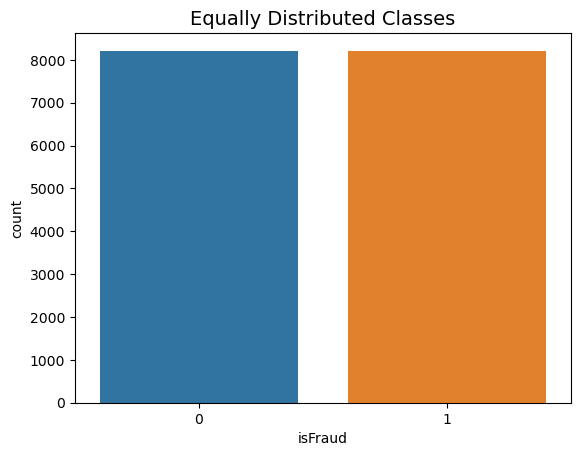

In [ ]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['isFraud'].value_counts()/len(new_df))



sns.countplot(x='isFraud',data= new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

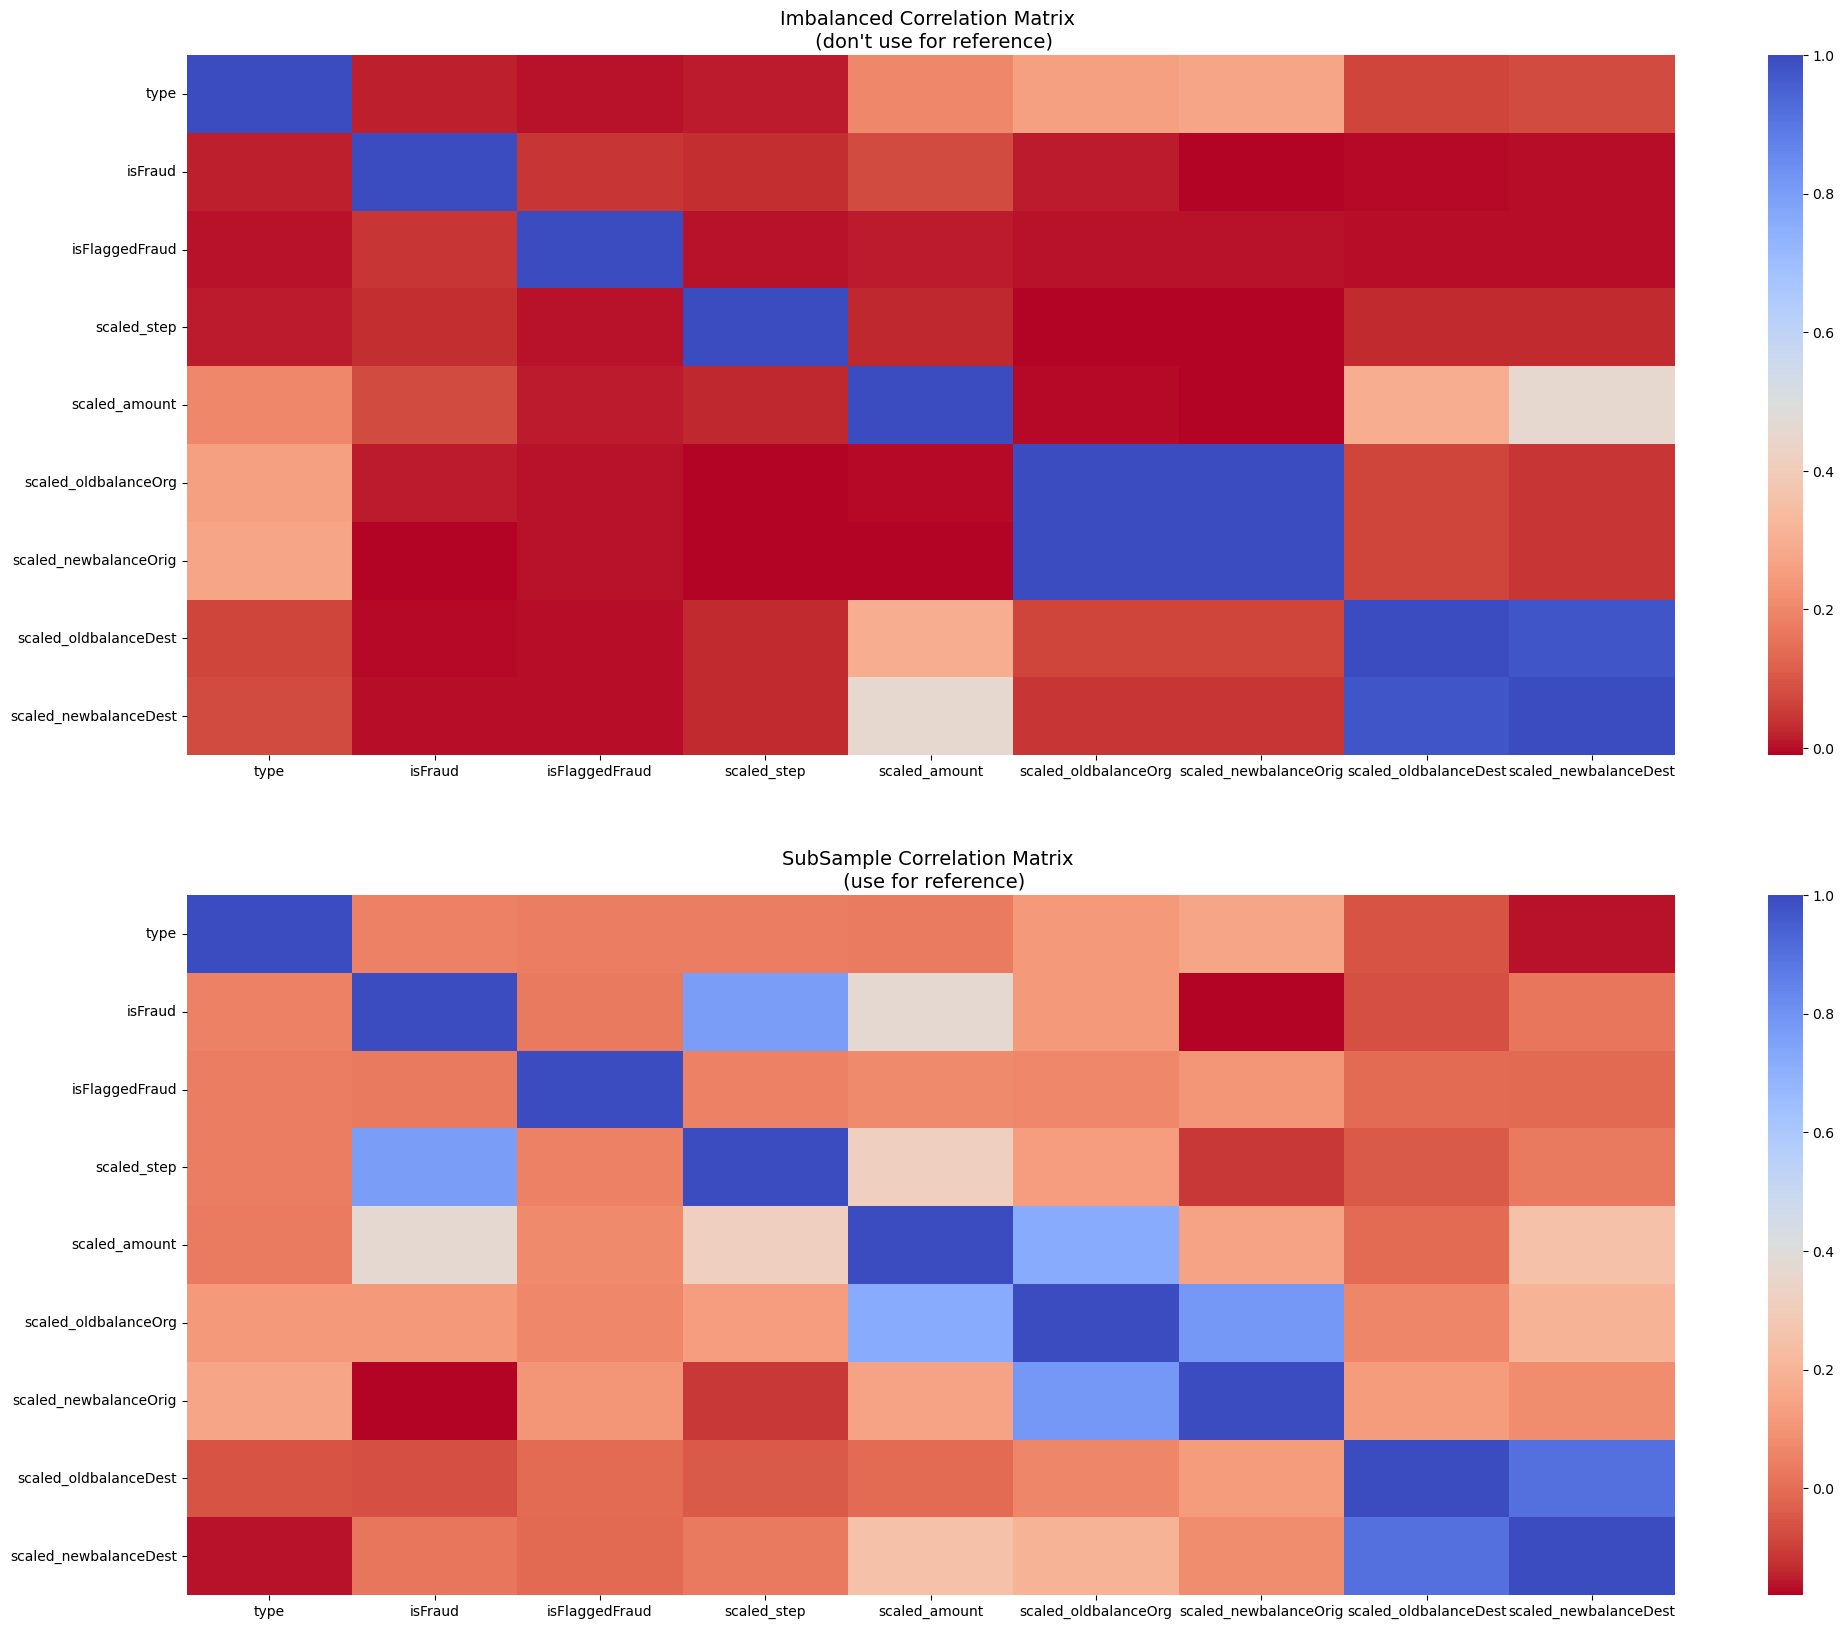

In [ ]:
 #Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':10}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':10}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

In [ ]:
# Undersampling before cross validating (prone to overfit)
X = new_df.drop('isFraud', axis=1)
y = new_df['isFraud']

In [ ]:
X.columns


Index(['type', 'isFlaggedFraud', 'scaled_step', 'scaled_amount',
       'scaled_oldbalanceOrg', 'scaled_newbalanceOrig',
       'scaled_oldbalanceDest', 'scaled_newbalanceDest'],
      dtype='object')

In [ ]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [ ]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

C:\Users\rithi\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifiers:  LogisticRegression Has a training score of 99.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 99.0 % accuracy score
Classifiers:  SVC Has a training score of 97.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 100.0 % accuracy score


In [ ]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)),
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# DecisionTree best estimator

dt = grid_tree.best_estimator_

C:\Users\rithi\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rithi\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

In [ ]:
# Overfitting Case
from sklearn.model_selection import cross_val_score


log_reg_pred = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_pred.mean() * 100, 2))


knears_pred = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_pred.mean() * 100, 2))

svc_pred = cross_val_score(grid_svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_pred.mean() * 100, 2))

tree_pred = cross_val_score(dt, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_pred.mean() * 100, 2))

Logistic Regression Cross Validation Score:  99.39
Knears Neighbors Cross Validation Score 99.27
Support Vector Classifier Cross Validation Score 99.03
DecisionTree Classifier Cross Validation Score 99.48


In [ ]:
scaler = StandardScaler()
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Assuming you already have X_train and y_train for model training

# Step 1: Create a Decision Tree model
dt = DecisionTreeClassifier()

# Step 2: Create a StandardScaler
scaler = StandardScaler()

# Step 3: Create a pipeline to apply StandardScaler and then train the model
pipeline = Pipeline([('scaler', scaler), ('dt', dt)])

# Define the parameter grid for grid search
tree_params = {
    'dt__criterion': ["gini", "entropy"],
    'dt__max_depth': list(range(2, 4, 1)),
    'dt__min_samples_leaf': list(range(5, 7, 1))
}

# Create a GridSearchCV object
search = GridSearchCV(pipeline, tree_params, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
search.fit(X_train, y_train)

# Access the best parameters after fitting the grid search
best_params = search.best_params_

best_params = {key.replace('dt__', ''): value for key, value in best_params.items()}


In [ ]:


best_model = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeClassifier(**best_params))
])


best_model = search.best_estimator_

# Step 4: Get multiple inputs from the user in dictionary format
user_data = {}
user_data['type'] = int(input("Enter your payment type in caps : "))
user_data['isFlaggedFraud'] = int(input("Enter your isFlaggedFraud : "))
user_data['scaled_step'] = float(input("Enter your step: "))
user_data['scaled_amount'] = float(input("Enter your amount : "))
user_data['scaled_oldbalanceOrg'] = float(input("Enter your oldbalanceOrg : "))
user_data['scaled_newbalanceOrig'] = float(input("Enter your newbalanceOrig : "))
user_data['scaled_oldbalanceDest'] = float(input("Enter your scaled_oldbalanceDest : "))
user_data['scaled_newbalanceDest'] = float(input("Enter your caled_newbalanceDest : "))


# Step 5: Preprocess the input
user_input_array = [[user_data['type'],
                    user_data['isFlaggedFraud'] ,
                    user_data['scaled_step'],
                    user_data['scaled_amount'],
                    user_data['scaled_oldbalanceOrg'],
                    user_data['scaled_newbalanceOrig'],
                    user_data['scaled_oldbalanceDest'],
                    user_data['scaled_newbalanceDest']]]

# Step 6: Make a prediction
prediction = best_model.predict(user_input_array)

# Step 7: Display the prediction
print("Model prediction:", prediction)

In [ ]:
# Import necessary libraries
import streamlit as st
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Assuming you already have X_train and y_train for model training

# Function to preprocess and predict
def predict(user_data, model):
    user_input_array = [[
        user_data['type'],
        user_data['isFlaggedFraud'],
        user_data['scaled_step'],
        user_data['scaled_amount'],
        user_data['scaled_oldbalanceOrg'],
        user_data['scaled_newbalanceOrig'],
        user_data['scaled_oldbalanceDest'],
        user_data['scaled_newbalanceDest']
    ]]
    prediction = model.predict(user_input_array)
    return prediction[0]

# Function to create and train the model
def train_model(X_train, y_train):
    dt = DecisionTreeClassifier()
    scaler = StandardScaler()
    pipeline = Pipeline([('scaler', scaler), ('dt', dt)])

    tree_params = {
        'dt__criterion': ["gini", "entropy"],
        'dt__max_depth': list(range(2, 4, 1)),
        'dt__min_samples_leaf': list(range(5, 7, 1))
    }

    search = GridSearchCV(pipeline, tree_params, cv=5, scoring='accuracy')
    search.fit(X_train, y_train)

    best_params = search.best_params_
    best_params = {key.replace('dt__', ''): value for key, value in best_params.items()}

    best_model = Pipeline([
        ('scaler', StandardScaler()),
        ('dt', DecisionTreeClassifier(**best_params))
    ])

    return best_model

# Main Streamlit app
def main():
    st.title("ML Project Streamlit App")
    st.sidebar.header("User Input")

    # Get user input
    user_data = {}
    user_data['type'] = st.sidebar.slider("Payment Type", 0, 1, 0)
    user_data['isFlaggedFraud'] = st.sidebar.slider("Is Flagged Fraud", 0, 1, 0)
    user_data['scaled_step'] = st.sidebar.slider("Step", 0.0, 1.0, 0.5)
    user_data['scaled_amount'] = st.sidebar.slider("Amount", 0.0, 1.0, 0.5)
    user_data['scaled_oldbalanceOrg'] = st.sidebar.slider("Old Balance Org", 0.0, 1.0, 0.5)
    user_data['scaled_newbalanceOrig'] = st.sidebar.slider("New Balance Orig", 0.0, 1.0, 0.5)
    user_data['scaled_oldbalanceDest'] = st.sidebar.slider("Old Balance Dest", 0.0, 1.0, 0.5)
    user_data['scaled_newbalanceDest'] = st.sidebar.slider("New Balance Dest", 0.0, 1.0, 0.5)

    # Train the model
    model = train_model(X_train, y_train)

    if st.sidebar.button("Make Prediction"):
        # Make a prediction
        prediction = predict(user_data, model)
        st.write("Prediction:", prediction)

if __name__ == "__main__":
    main()